## Working with projections in cartoee

In [1]:
import ee
from geemap import cartoee
import cartopy.crs as ccrs

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
ee.Initialize()

### Plotting an image on a map

Here we are going to show another example of creating a map with EE results. We will use global sea surface temperature data for Jan-Mar 2018.

In [3]:
# get an earth engine image of ocean data for Jan-Mar 2018
ocean = (
    ee.ImageCollection('NASA/OCEANDATA/MODIS-Terra/L3SMI')
    .filter(ee.Filter.date('2018-01-01', '2018-03-01'))
    .median()
    .select(["sst"],["SST"])
)

In [4]:
# set parameters for plotting
# will plot the Sea Surface Temp with specific range and colormap
visualization = {'bands':"SST",'min':-2,'max':30}
# specify region to focus on
bbox = [-180,-88,180,88]

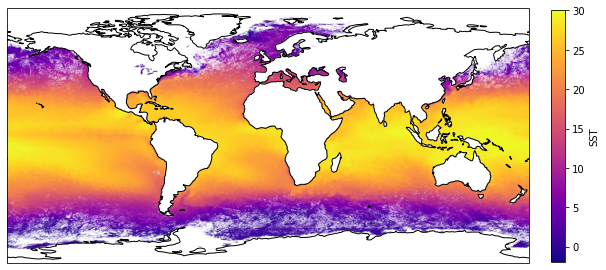

In [5]:
fig = plt.figure(figsize=(10,7))

# plot the result with cartoee using a PlateCarre projection (default)
ax = cartoee.get_map(ocean,cmap='plasma',vis_params=visualization,region=bbox)
cb = cartoee.add_colorbar(ax,vis_params=visualization,loc='right',cmap='plasma')

ax.coastlines()
plt.show()

### Mapping with different projections

You can specify what ever projection is available within `cartopy` to display the results from Earth Engine. Here are a couple examples of global and regions maps using the sea surface temperature example. Please refer to the [`cartopy` projection documentation](https://scitools.org.uk/cartopy/docs/latest/crs/projections.html) for more examples with different projections.

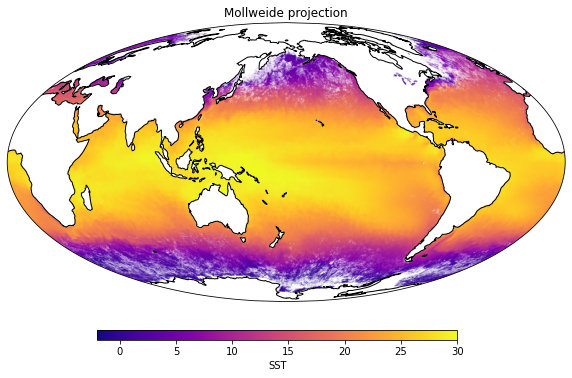

In [6]:
fig = plt.figure(figsize=(10,7))

# create a new Mollweide projection centered on the Pacific
projection = ccrs.Mollweide(central_longitude=-180)

# plot the result with cartoee using the Mollweide projection
ax = cartoee.get_map(ocean,vis_params=visualization,region=bbox,
                cmap='plasma',proj=projection)
cb = cartoee.add_colorbar(ax,vis_params=visualization,loc='bottom',cmap='plasma',
                    orientation='horizontal')

ax.set_title("Mollweide projection")

ax.coastlines()
plt.show()

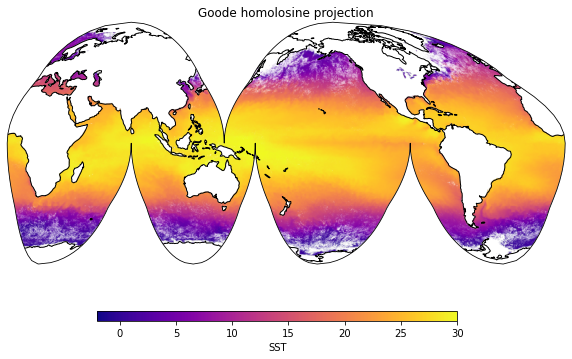

In [7]:
fig = plt.figure(figsize=(10,7))

# create a new Goode homolosine projection centered on the Pacific
projection = ccrs.InterruptedGoodeHomolosine(central_longitude=-180)

# plot the result with cartoee using the Goode homolosine projection
ax = cartoee.get_map(ocean,vis_params=visualization,region=bbox,
                cmap='plasma',proj=projection)
cb = cartoee.add_colorbar(ax,vis_params=visualization,loc='bottom',cmap='plasma',
                    orientation='horizontal')

ax.set_title("Goode homolosine projection")

ax.coastlines()
plt.show()

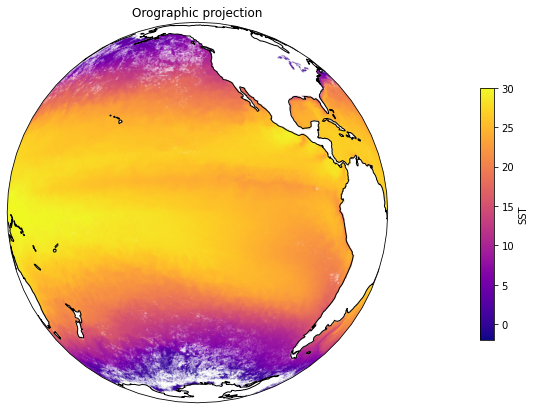

In [8]:
fig = plt.figure(figsize=(10,7))

# create a new orographic projection focused on the Pacific
projection = ccrs.Orthographic(-130,-10)

# plot the result with cartoee using the orographic projection
ax = cartoee.get_map(ocean,vis_params=visualization,region=bbox,
                cmap='plasma',proj=projection)
cb = cartoee.add_colorbar(ax,vis_params=visualization,loc='right',cmap='plasma',
                    orientation='vertical')

ax.set_title("Orographic projection")

ax.coastlines()
plt.show()

### Warping artifacts

Often times global projections are not needed so we use specific projection for the map that provides the best view for the geographic region of interest. When we use these, sometimes image warping effects occur. This is because `cartoee` only requests data for region of interest and when mapping with `cartopy` the pixels get warped to fit the view extent as best as possible. Consider the following example where we want to map SST over the south pole:

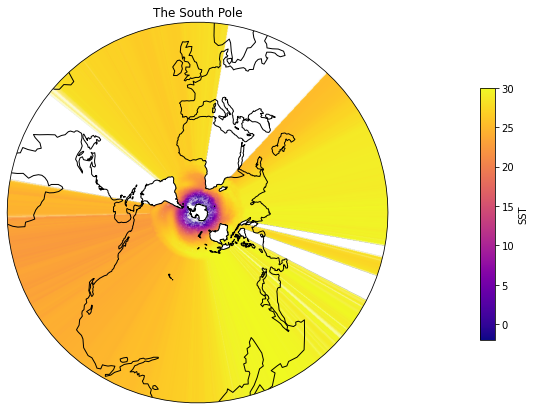

In [9]:
fig = plt.figure(figsize=(10,7))

# Create a new region to focus on
spole = [-180,-88,180,0]

projection = ccrs.SouthPolarStereo()

# plot the result with cartoee focusing on the south pole
ax = cartoee.get_map(ocean,cmap='plasma',vis_params=visualization,region=spole,proj=projection)
cb = cartoee.add_colorbar(ax,vis_params=visualization,loc='right',cmap='plasma')

ax.coastlines()
ax.set_title('The South Pole')
plt.show()

As you can see from the result there are warping effects on the plotted image. There is really no way of getting aound this (other than requesting a larger extent of data which may not alway be the case). 

So, what we can do is set the extent of the map to a more realistic view after plotting the image as in the following example:

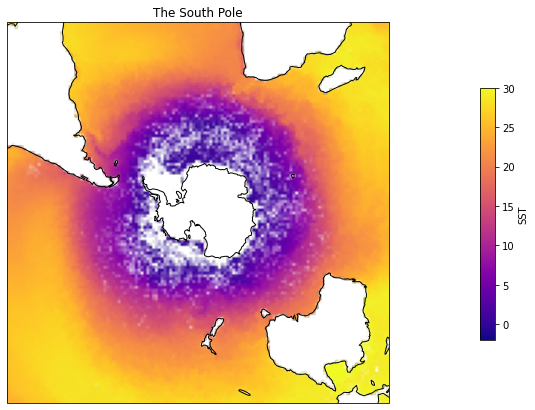

In [10]:
fig = plt.figure(figsize=(10,7))

# plot the result with cartoee focusing on the south pole
ax = cartoee.get_map(ocean,cmap='plasma',vis_params=visualization,region=spole,proj=projection)
cb = cartoee.add_colorbar(ax,vis_params=visualization,loc='right',cmap='plasma')

ax.coastlines()
ax.set_title('The South Pole')

# get bounding box coordinates of a zoom area
zoom = spole
zoom[-1] = -20

# convert bbox coordinate from [W,S,E,N] to [W,E,S,N] as matplotlib expects
zoom_extent = cartoee.bbox_to_extent(zoom)

# set the extent of the map to the zoom area
ax.set_extent(zoom_extent,ccrs.PlateCarree())

plt.show()

